In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
Invitations=pd.read_csv('Invitations.csv')

In [3]:
print('The total number of invitations is: {}'.format(Invitations.shape[0]))

The total number of invitations is: 421


In [4]:
Invitations.dtypes

From         object
To           object
Sent At      object
Message      object
Direction    object
dtype: object

In [4]:
rule1 = r'(?P<Month>\d{1,2})[/](?P<Day>\d{1,2})[/](?P<Year>\d{2})'
rule2 = r'(?P<Date>\d{1,2}[/]\d{1,2}[/]\d{2})'
rule3 = r'(?P<Time>\d{1,2}[:]\d{1,2}[ ]\w{1,2})'
rule4 = r'(?P<Hour> \w{1,2})'
rule5 = r'(?P<AP> am|pm)'
extract_df = Invitations['Sent At'].str.lower().str.extract(rule1)
extract_df['Date']=Invitations['Sent At'].str.lower().str.extract(rule2)
extract_df['Time']=Invitations['Sent At'].str.lower().str.extract(rule3)
extract_df['Hour']=Invitations['Sent At'].str.lower().str.extract(rule4)
extract_df['AP']=Invitations['Sent At'].str.lower().str.extract(rule5)
extract_df.head()

,Month,Day,Year,Date,Time,Hour,AP
0,11,8,22,11/8/22,11:50 am,11,am
1,11,4,22,11/4/22,5:52 pm,5,pm
2,11,4,22,11/4/22,2:09 pm,2,pm
3,11,1,22,11/1/22,11:33 am,11,am
4,10,29,22,10/29/22,5:46 pm,5,pm


In [5]:
Invitations=pd.concat([Invitations, extract_df], axis=1)

In [6]:
Int_list=['Month', 'Day', 'Year', 'Hour']
for variable in Int_list:
    Invitations[variable]=Invitations[variable].astype(int)
Invitations.dtypes

From         object
To           object
Sent At      object
Message      object
Direction    object
Month         int32
Day           int32
Year          int32
Date         object
Time         object
Hour          int32
AP           object
dtype: object

In [7]:
def hour_std(x):
    if x['AP']=='pm':
        x['Hour']+=12
    return x['Hour']

Invitations['Hour_st24']=Invitations.apply(hour_std, axis=1)

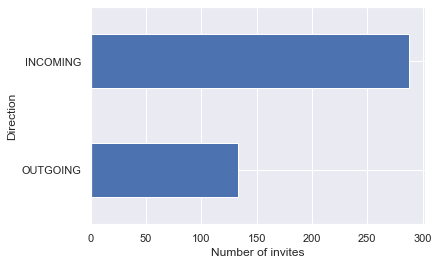

In [8]:
pivot=Invitations.pivot_table(index='Direction', values='From', aggfunc='count')
pivot=pivot.sort_values('From')
pivot.plot.barh(figsize=(6,4),  width= 0.5, legend=None)
plt.xlabel('Number of invites')
plt.show()

In [11]:
pivot.reset_index()

Direction,Year,Month,INCOMING,OUTGOING
0,19,11,9.0,0.0
1,19,12,34.0,0.0
2,20,1,12.0,0.0
3,20,2,8.0,0.0
4,20,3,3.0,0.0
5,20,4,1.0,0.0
6,20,6,1.0,0.0
7,21,9,1.0,0.0
8,21,12,1.0,0.0
9,22,4,0.0,4.0


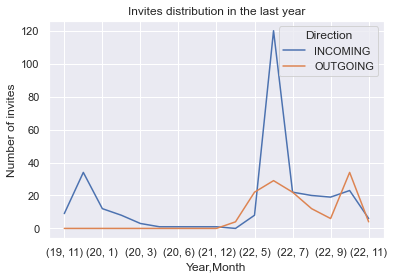

In [12]:
pivot=Invitations.pivot_table(index=['Year', 'Month'] , columns=['Direction'],values='From', aggfunc='count').fillna(0) #, columns='Month'
pivot.sort_values(['Year', 'Month'], ascending=True)
pivot.plot()
plt.title('Invites distribution in the last year')
plt.ylabel('Number of invites')
plt.show()

In [13]:
pivot = Invitations.pivot_table(index=['AP'], values=['From'], aggfunc='count', margins=False)
pivot1=pivot.reset_index()
pivot1['percentage']= np.round(100* (pivot1['From']/pivot1['From'].sum()),1)

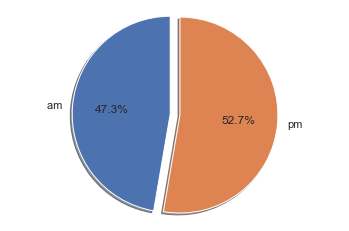

In [14]:
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(pivot1['percentage'], explode=explode, labels=pivot1['AP'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

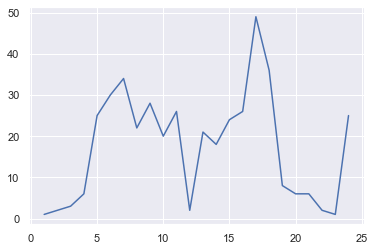

In [15]:
plt.plot(Invitations.pivot_table(index=['Hour_st24'], values='From', aggfunc='count'))
plt.show()

In [16]:
Messages=Invitations['Message'].dropna()
len(Messages)

45

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andrea.huerfano\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
def word_cloud(column):
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    nltk.download('stopwords')
    from wordcloud import WordCloud, STOPWORDS 
    import matplotlib.pyplot as plt 

    comment_words = '' 
    stopwords = stopwords.words()

    for val in column: 
        val = str(val) 
        tokens = val.split() 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 


    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andrea.huerfano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


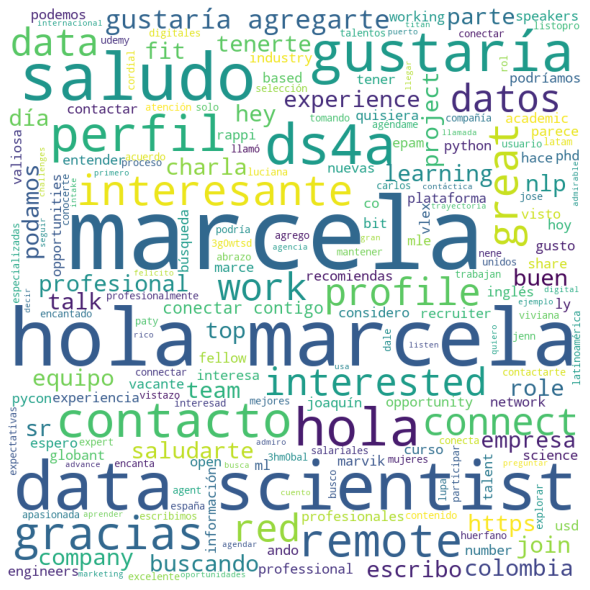

In [19]:
word_cloud(Messages)

In [21]:
Connections=pd.read_csv('Connections.csv', skiprows=2)

In [22]:
Connections=Connections[Connections['First Name'].isna()==False]
Connections.shape

(1935, 6)

In [23]:
pd.set_option("display.max_rows", 800)
pivot=Connections.pivot_table(index='Company', values='First Name', aggfunc='count').sort_values(by='First Name', ascending=False)
pivot.rename(columns={'First Name':'Contacts'})

,Contacts
Company,
Globant,88
Mercado Libre,51
Amazon Web Services (AWS),33
Microsoft,24
Universidad Nacional de Colombia,18
...,...
GitHub,1
Gilead Sciences,1
Gildan,1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andrea.huerfano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


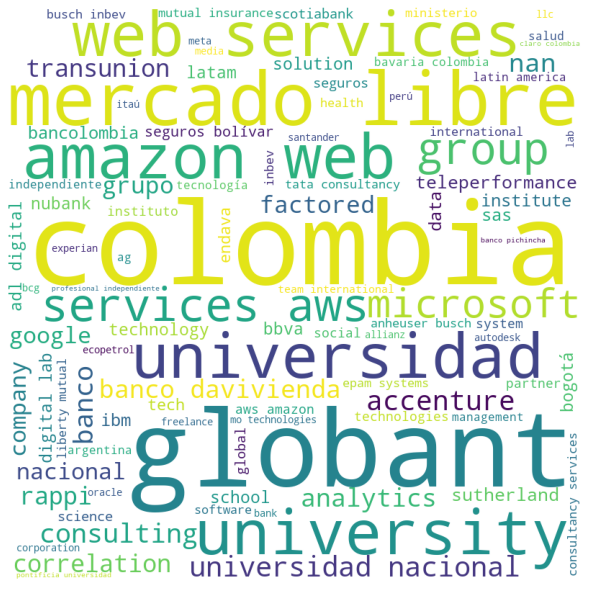

In [24]:
word_cloud(Connections.Company)

In [25]:
Sector_financiero=['Secret Digital Bank','Secret digital bank', 'Banco Davivienda', 'CredibanCo', 'Scotiabank', 'AXA COLPATRIA', 'Scotiabank Colpatria', 'Bancolombia', 'Interbank',
                   'Banco Falabella Colombia', 'Banco de las Microfinanzas - Bancamia S.A.', 'Tuya S.A', 'BBVA Data & Analytics', 
                  'Itaú Colombia','Banco AV Villas', 'World Bank Group', 'Omni|Bnk', 'OmniLatam' , 'OmniBnk', 'Nubank', 'Qnt', 
                  'Colpatria Multibanca del Grupo Scotiabank', 'Planeacion Financiera Colombia', 'PRODUBANCO - Grupo Promerica',
                   'Sistemcobro SA', 'Citi', 'Citibanamex', 'CORREDORES DAVIVIENDA S.A.', 'Credivalores'
                   ,'Credicorp Capital', 'BNP Paribas Cardif', 'Bancamia', 'Digital Bank - GNB Sudameris Group']
#Contenga la palabra banco, BBVA, bank
Sector_asegurador=['Seguros Bolivar S.A', 'Mercer', 'Seguros Bolívar S.A.', 'Liberty Mutual Insurance', 'Allianz Colombia', 'PROTECCIÓN S.A.', 'SBS Seguros Colombia S.A.', 
                  'Quálitas Compañía de Seguros, S.A.B. de C.V.', 'Porvenir Pensiones y Cesantías', 'Seguros Confianza', 
                   'Seguros SURA', 'Sura', 'Colmena Seguros', 'Federacion de Aseguradores Colombianos Fasecolda']
Consultoras=['Accenture', 'Landing AI', 'Idata - Inteligencia y Analítica de Datos', 'Grupodot', 'Big Bang Data S.A.S.', 
             'INFÓRMESE', 'Accenture Colombia', 'Accenture AI', 'McKinsey & Company', 'Quantil SAS', 'Michael Page', 
             'Nielsen', 'Analytic Lab', 'COREBI Data & Analytics', 'Factored', 'SEIDOR Analytics', 'Risk Monitor SAS', 
             'NovaQuality Consulting', 'iDATA S.A.S', 'i-Quality SAS', 'iDATA ® - Advanced Analytics for Business', 
             'itPerforma', 'uDA. urbanData Analytics', 'everis', 'easyBIGDATA', 'Whale and Jaguar', 'addactis', 
            'Tata Consultancy Services', 'Centro Nacional de Consultoría', 'Applying Consulting SAC', 'ADDACTIS GROUP', 
             'Brink’s Inc', 'BIG BANG DATA'] #contenga KPMG
Comunicacion=['Telefónica', 'Claro Colombia', 'Tigo Colombia']
Educacion=['Universidad Nacional de Colombia', 'Correlation One', 'Universidad de Los Andes', 'Pontificia Universidad Javeriana',
          'Fundación Universitaria Panamericana', 'Escuela Colombiana de Inteligencia Artificial', 'Acámica', 'deeplearning.ai', 
          'Michigan Technological University', 'Princeton University', 'Massachusetts Institute of Technology', 
          'Max Planck Institute for Physics', 'Mazandaran University of Sciences and Technology', 'Open Knowledge Brasil', 
          'Northwestern Polytechnical University', 'Platzi', 'Politécnico Grancolombiano', 'Postgrado UC', 
          'Tutor.com', 'UC San Diego', 'UNIMINUTO Colombia', 'UNMATTER', 'Udacity', 'handytec Academy', 
          'Servicio Nacional de Aprendizaje (SENA)', 'Space Sciences Laboratory - UC Berkeley', 'The Alan Turing Institute', 
          'The London School of Economics and Political Science (LSE)', 'Statistics Netherlands (CBS)', 
          'Dirección Académica, Universidad Nacional de Colombia', 'Leibniz Institute for Solar Physics - KIS', 
           'Faculdade de Ciências da Universidade de Lisboa'] ##Adicionar regla para que contenga 'Universidad' 'Institute'
Centrales_riesgo=['TransUnion', 'Experian']
Tecnologia=['Globant', 'ADL Digital Lab', 'Microsoft', 'Google', 'Amazon', 'Oracle', 'Endava', 'Teradata', 'Amazon Web Services (AWS)'
            , 'Evalueserve', 'Tableau Software', 'Tech Data', 'SAP', 'Alteryx', 'McAfee', 'RStudio, Inc.', 'NVIDIA', 'Indra', 'SAS',
           'NASA Langley Research Center', 'VATES - Software', 'Truelogic Software', 'everis Perú', 'Willis Towers Watson', 
           'Women IT Mujeres Innovacion y Tecnologia', 'WomenTech Network', 'Softtek', 'Solera, Inc.', 'Teamcore Solutions', 'Equisoft']
Delivery=['Linio', 'Rappi', 'Mercado Libre', 'Domicilios.com', 'iFood Colombia', 'RobinFood']
Estatales=['Departamento Administrativo Nacional de Estadística - DANE Colombia', 'Superintendencia Financiera de Colombia', 
          'Instituto Colombiano para la Evaluación de la Educación (ICFES)', 'National Planning Department DNP', 
           'SECRETARIA DISTRITAL DE SALUD DE BOGOTA', 'Presidencia de la República de Colombia', 'Ministerio del Interior, Obras Públicas y Vivienda', 
          'Ministerio de Desarrollo Productivo', 'UIAF', 'Secretaria Distrital de Planeación de Bogotá - Dirección de Estratificación',
          'Secretaría Distrital de Salud', 'Departamento Nacional de Planeación', 'Alcaldía Mayor de Bogotá',
           'Alcaldía de Medellín', 'Fondo Nacional del Ahorro (FNA)']
BPO=['Sutherland', 'Teleperformance', 'Experis/Manpower Group', 'Outsourcing S.A Oficial', 'PeakU - HeadHunter', 
    'nHRMS - “n Human Resources & Management Systems”', 'Sitel', 'Sutherland Global Services', 'Concentrix', 'Financreditos BPO']

In [26]:
def segmento(x):
    if x in Sector_financiero:
        return 'Banking'
    elif x in Sector_asegurador:
        return 'Insurance'
    elif x in Consultoras:
        return 'Consulting'
    elif x in Educacion:
        return 'Education'
    elif x in Centrales_riesgo:
        return 'Information centers'
    elif x in Tecnologia:
        return 'Technology'
    elif x in Delivery:
        return 'Delivery'
    elif x in Estatales:
        return 'Goverment'
    elif x in BPO:
        return 'BPO'
    else: 
        return 'Other'

In [27]:
Connections['Industry']=Connections['Company'].apply(segmento)

In [28]:
Connections.pivot_table(index='Industry', values='Company', aggfunc='count').sort_values('Company', ascending=False)

,Company
Industry,
Other,1391
Technology,206
Banking,77
Delivery,67
Education,52
Consulting,42
BPO,27
Insurance,27
Information centers,18


In [29]:
Connections.Company=Connections.Company.fillna('Unknown')
Connections['Activity_2'] = np.where(Connections.Company.str.contains("Banco"),"Banking",
                   np.where(Connections.Company.str.contains("Bank"), "Banking",
                   np.where(Connections.Company.str.contains("Cred"), "Banking",
                   np.where(Connections.Company.str.contains("Fiduci"), "Banking",         
                   np.where(Connections.Company.str.contains("Seguro"), "Insurance", 
                   np.where(Connections.Company.str.contains("Digital"), "Consulting",
                   np.where(Connections.Company.str.contains("Solut"), "Consulting",
                   np.where(Connections.Company.str.contains("KPMG"), "Consulting",
                   np.where(Connections.Company.str.contains("Page"), "Consulting",
                   np.where(Connections.Company.str.contains("Analy"), "Consulting",
                   np.where(Connections.Company.str.contains("Consult"), "Consulting",
                   np.where(Connections.Company.str.contains("Data"), "Consulting",
                   np.where(Connections.Company.str.contains("Enterp"), "Consulting",
                   np.where(Connections.Company.str.contains("Soluti"), "Consulting",
                   np.where(Connections.Company.str.contains("Log"), "Consulting",
                   np.where(Connections.Company.str.contains("Univers"), "Education",
                   np.where(Connections.Company.str.contains("Instit"), "Education",
                   np.where(Connections.Company.str.contains("Scuola"), "Education",
                   np.where(Connections.Company.str.contains("School"), "Education",
                   np.where(Connections.Company.str.contains("Hopki"), "Education",
                   np.where(Connections.Company.str.contains("Minu"), "Education",
                   np.where(Connections.Company.str.contains("Nacional"), "Goverment",
                   np.where(Connections.Company.str.contains("National"), "Goverment",
                   np.where(Connections.Company.str.contains("Colom"), "Goverment",
                   np.where(Connections.Company.str.contains("Bogo"), "Goverment",
                   np.where(Connections.Company.str.contains("Tech"), 'Technology',
                   np.where(Connections.Company.str.contains("Tecn"), 'Technology',
                   np.where(Connections.Company.str.contains("Software"), 'Technology',
                   np.where(Connections.Company.str.contains("Artifi"), 'Technology',
                   np.where(Connections.Company.str.contains("Claro"), 'Communication',
                   np.where(Connections.Company.str.contains("Tigo"), 'Communication',
                   np.where(Connections.Company.str.contains("Tele"), 'Communication',
                            
                            'Other'))))))))))))))))))))))))))))))))

In [30]:
Connections['Industry']=Connections['Industry'].apply(lambda x: np.nan if x=='Other' else x )

In [31]:
Connections['Industry']=Connections['Industry'].fillna(Connections.Activity_2)

In [32]:
Connections.pivot_table(index='Industry', values='Company', aggfunc='count').sort_values('Company', ascending=False)

,Company
Industry,
Other,1039
Technology,252
Education,154
Consulting,132
Banking,115
Goverment,83
Delivery,67
Insurance,34
BPO,27


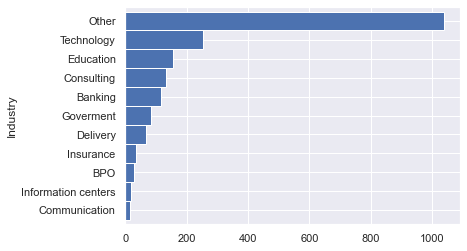

In [33]:
Connections.pivot_table(index='Industry',values='Company', aggfunc='count').sort_values('Company', ascending=True).plot(kind='barh', legend=None, width=1)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andrea.huerfano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


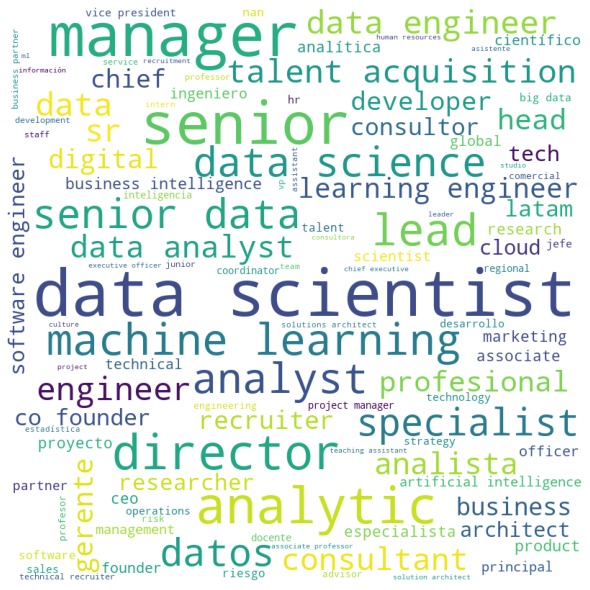

In [34]:
word_cloud(Connections.Position)

In [35]:
Connections.Position=Connections.Position.fillna('Unknown')
Connections.Position=Connections.Position.str.lower()
Connections['Position_2'] = np.where(Connections.Position.str.contains("scien"),"Data Scientist",
                   np.where(Connections.Position.str.contains("cient"),"Data Scientist",
                   np.where(Connections.Position.str.contains("artf"),"Data Scientist",
                   np.where(Connections.Position.str.contains("learn"),"Data Scientist",
                   np.where(Connections.Position.str.contains("big"),"Data Scientist",
                   np.where(Connections.Position.str.contains("dat"),"Data Scientist",
                   np.where(Connections.Position.str.contains("estad"),"Statistician/Math",
                   np.where(Connections.Position.str.contains("estad"),"Statistician/Math",
                   np.where(Connections.Position.str.contains("statisti"),"Statistician/Math",
                   np.where(Connections.Position.str.contains("math"),"Statistician/Math",
                   np.where(Connections.Position.str.contains("matem"),"Statistician/Math",
                   np.where(Connections.Position.str.contains("model"),"Statistician/Math",
                   np.where(Connections.Position.str.contains("actua"),"Statistician/Math",
                   np.where(Connections.Position.str.contains("pric"),"Statistician/Math",
                   np.where(Connections.Position.str.contains("analy"), "Analyst/Consultant",
                   np.where(Connections.Position.str.contains("anali"), "Analyst/Consultant",
                   np.where(Connections.Position.str.contains("analí"), "Analyst/Consultant",
                   np.where(Connections.Position.str.contains("consult"), "Analyst/Consultant",
                   np.where(Connections.Position.str.contains("busine"), "Business Intelligence",
                   np.where(Connections.Position.str.contains("negocio"), "Business Intelligence",
                   np.where(Connections.Position.str.contains("intel"), "Business Intelligence",
                   np.where(Connections.Position.str.contains("recr"), "Recruiter",
                   np.where(Connections.Position.str.contains("recl"), "Recruiter",
                   np.where(Connections.Position.str.contains("recursos"), "Recruiter",
                   np.where(Connections.Position.str.contains("hunter"), "Recruiter",
                   np.where(Connections.Position.str.contains("acqui"), "Recruiter",
                   np.where(Connections.Position.str.contains("talent"), "Recruiter",
                   np.where(Connections.Position.str.contains("human"), "Recruiter",
                   np.where(Connections.Position.str.contains("hr"), "Recruiter",
                   np.where(Connections.Position.str.contains("humanos"), "Recruiter",
                   np.where(Connections.Position.str.contains("attrac"), "Recruiter",
                   np.where(Connections.Position.str.contains("sourcing"), "Recruiter",
                   np.where(Connections.Position.str.contains("soft"), "Developer",
                   np.where(Connections.Position.str.contains("devel"), "Developer",
                   np.where(Connections.Position.str.contains("sist"), "Developer",
                   np.where(Connections.Position.str.contains("tech"), "Developer",
                   np.where(Connections.Position.str.contains("cloud"), "Developer",
                   np.where(Connections.Position.str.contains("arch"), "Developer",
                   np.where(Connections.Position.str.contains("computat"), "Developer",
                   np.where(Connections.Position.str.contains("program"), "Developer",
                   np.where(Connections.Position.str.contains("research"), "Developer",
                   np.where(Connections.Position.str.contains("tester"), "Developer",
                   np.where(Connections.Position.str.contains("desarr"), "Developer",
                   np.where(Connections.Position.str.contains("partner"), "Engineer",
                   np.where(Connections.Position.str.contains("inge"), "Engineer",
                   np.where(Connections.Position.str.contains("engi"), "Engineer",
                   np.where(Connections.Position.str.contains("indus"), "Engineer",
                   np.where(Connections.Position.str.contains("logist"), "Engineer",
                   np.where(Connections.Position.str.contains("profesor"),"Teacher",
                   np.where(Connections.Position.str.contains("teach"),"Teacher",
                   np.where(Connections.Position.str.contains("instru"),"Teacher",
                   np.where(Connections.Position.str.contains("cated"),"Teacher",
                   np.where(Connections.Position.str.contains("lect"),"Teacher",
                   np.where(Connections.Position.str.contains("professor"),"Teacher",
                   np.where(Connections.Position.str.contains("docente"),"Teacher",
                   np.where(Connections.Position.str.contains("ceo"), "Leardership",
                   np.where(Connections.Position.str.contains("scrum"), "Leardership",
                   np.where(Connections.Position.str.contains("vp"), "Leardership",
                   np.where(Connections.Position.str.contains("founder"), "Leardership",
                   np.where(Connections.Position.str.contains("director"), "Leardership",
                   np.where(Connections.Position.str.contains("lead"), "Leardership",
                   np.where(Connections.Position.str.contains("lider"), "Leardership",
                   np.where(Connections.Position.str.contains("líder"), "Leardership",
                   np.where(Connections.Position.str.contains("manager"), "Leardership",
                   np.where(Connections.Position.str.contains("jefe"), "Leardership",
                   np.where(Connections.Position.str.contains("coordi"), "Leardership",
                   np.where(Connections.Position.str.contains("gerente"), "Leardership",
                   np.where(Connections.Position.str.contains("gerente"), "Leardership",
                   np.where(Connections.Position.str.contains("specialist"), "Leardership",
                   np.where(Connections.Position.str.contains("ambass"), "Leardership",
                   np.where(Connections.Position.str.contains("advisor"), "Leardership",
                   np.where(Connections.Position.str.contains("chief"), "Leardership",
                   np.where(Connections.Position.str.contains("fundad"), "Leardership",
                   np.where(Connections.Position.str.contains("executive"), "Leardership",
                   np.where(Connections.Position.str.contains("head"), "Leardership",
                   np.where(Connections.Position.str.contains("president"), "Leardership",
                   np.where(Connections.Position.str.contains("proyect"), "Leardership",
                   np.where(Connections.Position.str.contains("market"), "Marketing/Sales",
                   np.where(Connections.Position.str.contains("comerc"), "Marketing/Sales",
                   np.where(Connections.Position.str.contains("sales"), "Marketing/Sales",
                   np.where(Connections.Position.str.contains("design"), "Marketing/Sales",
                   np.where(Connections.Position.str.contains("brand"), "Marketing/Sales",
                   np.where(Connections.Position.str.contains("dise"), "Marketing/Sales",
                   np.where(Connections.Position.str.contains("content"), "Marketing/Sales",
                        
                            
                            'Other'))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))
Connections.pivot_table(index='Position_2', values='Company', aggfunc='count').sort_values('Company', ascending=True)

,Company
Position_2,
Marketing/Sales,13
Engineer,42
Teacher,43
Statistician/Math,61
Business Intelligence,71
Other,147
Recruiter,148
Developer,236
Analyst/Consultant,240


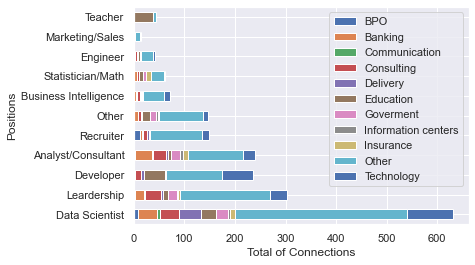

In [36]:
pivot = Connections.pivot_table(index='Position_2',columns='Industry', values='Company', aggfunc='count').sort_values(by='Position_2', ascending=False)
pivot = pivot.rename_axis(None, axis=1)
pivot=pivot.sort_values('Other', ascending=False)
pivot.plot(kind="barh", stacked=True)
plt.xlabel('Total of Connections')
plt.ylabel('Positions')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andrea.huerfano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


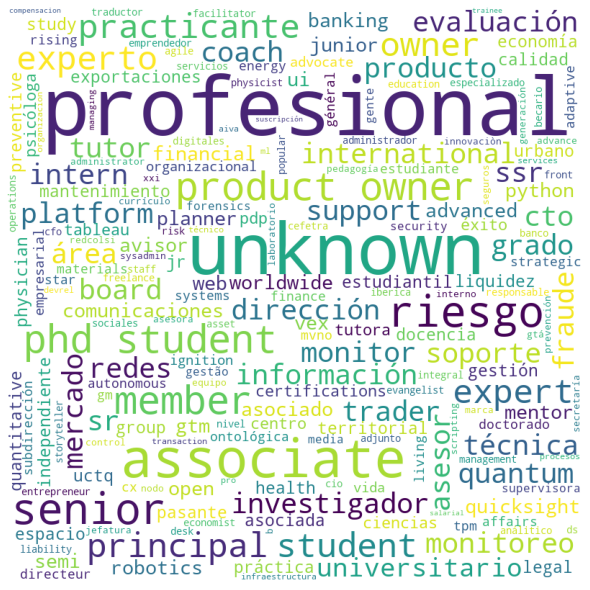

In [37]:
word_cloud(Connections[Connections['Position_2']=='Other'].Position)